# Příklad o Pizze
* Chceš jít s kamarádem na Pizzu.
* Nabídka je jasná, menší pizza stojí 100; větší, která má o 10cm větší průměr, stojí ale 200

## Otázky
* Při jakém průměru se vyplatí koupit 2 menší, a kdy 1 větší?
* Vyplatí se někdy koupit 1 větší než 3 menší?

# Bonus:
* Jak se řešení změní pokud vás nezyjímá 1 cm suchého okraje pizzy?

---
---
# Pokud je toto tvůj první Jupyter Notebook:
* Buňka (cell) se provede kombinací Shift-Enter, musíš v ní mít ale kurzor.
* Po úspěšném proběhnutí buňky se objeví nalevo od ní "pořadové" číslo průběhu.
* Provedení buňky a vytvoření nové prázdné pod ní, použij Alt-Enter.
* Jakýkoli text za znakem # je komentář a Python ho ignoruje až do konce řádku.
* Pozor: Pokud proběhneš prázdnou buňku, která má pod sebou výstup jako nápovědu, nápověda ti zmizí, proto Alt-Enter.
---
---

In [9]:
# importuj  klasické moduly jako ve výkladu


In [10]:
# neznámá je pro nás průměr pizzy (d)
# vytvoř pole rozumných hodnot d


[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50. ]


## Podmínka kterou hledáme je, kdy dvě plochy menší pizzy je víc než plocha 1 větší

$2S_{mensi}{\gt}S_{vetsi}$

* Doufejme, že je pizza kruhová

$ 2{\cdot}\pi\left(\dfrac{d}{2}\right)^2 \gt \pi\left(\dfrac{d+10}{2}\right)^2$

Po převedení na jednu stranu řešíme kdy má výsledná funkce hodnoty > 0
* POZN. $\pi$ se v pythonu zapisuje jako np.pi

In [11]:
# spočti hodnoty funkce pro d, která sis vybrala


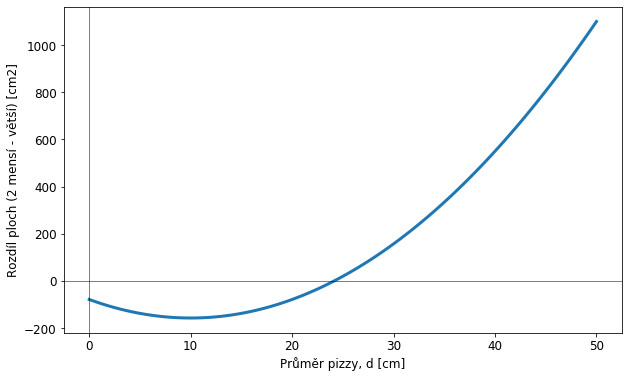

In [13]:
# A teď vykresli naši funkci, spolu s osou x, jako je níže



---

## Spočtěme průsečík přesně. Máme dvě možnosti:
1. Ve výkladu máme metodu, kdy musíme znát a,b,c, tedy upravit náš výraz na papíře.
2. V praxi řeššení složitých výrazů to neni moc výhodné pokaždé přepočítávat a,b,c.
* Proto líní programátoři vymysleli funkci FSOLVE, která řeší rovnice numericky.

In [14]:
# musíme si ji však importovat, abychom ji mohli použít
from scipy.optimize import fsolve

In [15]:
## Do fsolve musíme vložit funkci proměné/proměných
## To můžeme udělat například následovně:
# definuji (def) funkci jménem rozdil_ploch (to co vykreslujeme na ose y)


In [16]:
# funcki si otestujeme pro d=10


-157.07963267948966

To znamená, že pro průměr 10cm, 2 pizzy jsou menší o $157\,cm^2$.

---

## Můžete sami vyzkoušet vkládat různé hodnoty d
 * Zkusmo tak zjistíte, kdy se rozdíl ploch stane kladným.
 * A to je moment, kdy chcete koupit větší pizzu místo 2 malých.

In [17]:
# Teď vložíme tento výraz do FSOLVE, abychom to měli doufejme přesnější


TypeError: fsolve() missing 1 required positional argument: 'x0'

In [18]:
## Co znamená tato chyba?
# FSOLVE po nás potřebuje nutný vstup x0: což je v podstatě odhad (nástřel) řešení.
# pokud napíšete fsolve a poté Shift-Tab, měla by se vám objevit nápověda se všemi vstupními parametry pro fsolve


array([24.14213562])

# FSOLVE je mocný nástroj
* Funguje na jakýkoli typ rovnice, nejen na kvadratickou.
* Můžeme s ním řešit dokonce i soustavy rovnic.

## Bohužel nemůžeme být příliš důvěřiví (Vyzkoušejte sami):
* Pokud budete s x0 blízko prvního průsečíku, vrátí se vám kořen kv. rovnice, který je nelogický (negativní pizza).
* Pokud budete blízko Vrcholu (x0=10), tj. minima kv. funkce, FSOLVE bude zmatená, kterým směrem se z minima paraboly vydat.
* Pokud budete rozumně blízko s x0, máte vyhráno.

---

## Teď zkuste vyřešit, kdy se vyplatí 1 větší místo tří menších pizz?
* Pozor, tato otázka je opačně položena než ta první

In [19]:
## definuj f2, podobně jako předtím f1


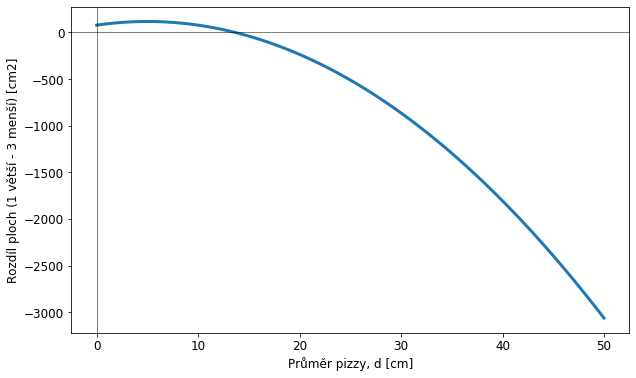

In [20]:
# Vykresli funkci spolu s osou x, jako je níže


In [21]:
# definuji rozdil_ploch2 (to co vykreslujeme na ose y), který zavisí jen na d
# novou funkci potřebujeme protože teď počítáme 3 vs 1


In [22]:
# Zkuste FSOLVE pro x0=11


array([13.66025404])

Do 13.7 cm je lepší koupit 1 větší než 3 menší pizzy.

---

## Jestli už vám vyhládlo, dobrá práce a dobrou chuť. Pokud ne, zkuste rozšířit řešení o problém se suchým okrajem...

* Co když nemáte rádi ten známí 1cm okraje pizzy, a tedy by měl být vyloučen z úvah?
* Jak to ovlivní vaše rozhodnutí se 2 a třemi pizzami?

In [23]:
# Nejjednodušší je upravit naše funkce pro výpočet rozdílu ploch 
# přidáním volného parametru okraj, který má význam tloušťky okraje v cm.


# pro 3 vs 1


In [24]:
# Zopakujte FSOLVE, hodnotu tloušťky okraje vložíte jako args=1


array([26.14213562])

array([15.66025404])

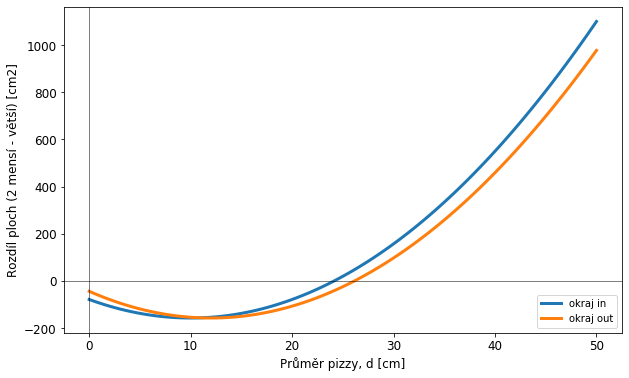

In [26]:
# Opětovné vykreslení grafů


## Otázka k zamyšlení:
### Je správně, že křivka pro d < 10 roste? Jak si to vysvětluješ? 

----

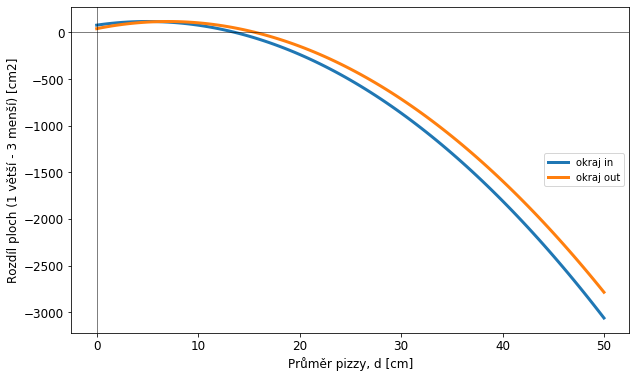

# Gratuluji k dokončení a zdar!!!